<a href="https://colab.research.google.com/github/AnushkaSamaranayake/Simple-convolutional-neural-network-to-perform-classification/blob/main/assignment3_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load Fashion MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values (between 0 and 1)
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Split the full training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

# Reshape data for CNN input
X_train = X_train[..., tf.newaxis]
X_val = X_val[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

# One-hot encode labels (for categorical classification)
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


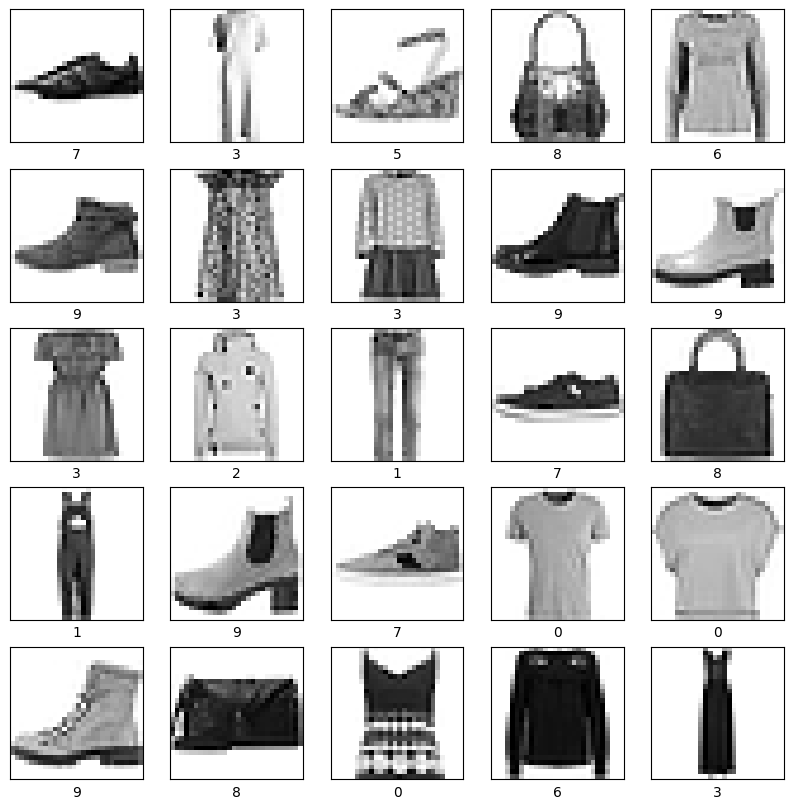

In [2]:
#visualize the data set
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),  # Add Batch Normalization
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),  # Add Batch Normalization
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.6),  # Increased dropout rate

    Dense(10, activation='softmax')
])

# Display the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

In [4]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7196 - loss: 0.8465 - val_accuracy: 0.8636 - val_loss: 0.3661
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8418 - loss: 0.4353 - val_accuracy: 0.8832 - val_loss: 0.3063
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8672 - loss: 0.3667 - val_accuracy: 0.8717 - val_loss: 0.3344
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8810 - loss: 0.3337 - val_accuracy: 0.8946 - val_loss: 0.2855
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8894 - loss: 0.3107 - val_accuracy: 0.9012 - val_loss: 0.2731
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8964 - loss: 0.2846 - val_accuracy: 0.9052 - val_loss: 0.2600
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9005 - loss: 0.2764 - val_accuracy: 0.9043 - val_loss: 0.2625
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9066 - loss: 0.25

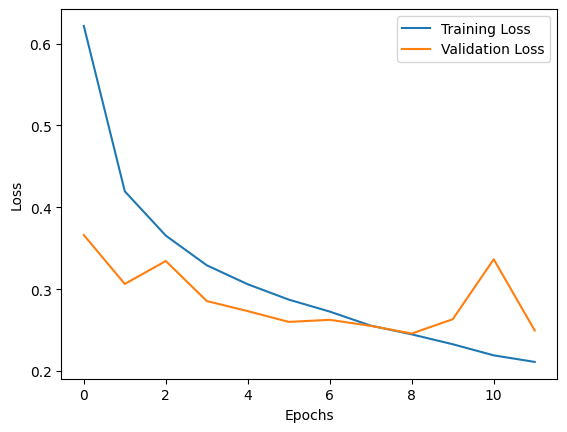

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10, width_shift_range=0.1, height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the generator on training data
datagen.fit(X_train)


history = model.fit(
    X_train, y_train, epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    batch_size=32
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [6]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict the labels for the test data
y_pred = model.predict(X_test).argmax(axis=1)

# Generate confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 90.26%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
 [[843   0  13  23   7   2 104   0   8   0]
 [  1 973   0  18   1   0   4   0   3   0]
 [ 18   0 826   8  95   0  51   0   2   0]
 [  8   3   9 915  32   0  31   0   2   0]
 [  0   0  31  32 897   0  36   0   4   0]
 [  0   0   0   0   0 978   0  12   0  10]
 [108   0  57  26 113   0 675   0  21   0]
 [  0   0   0   0   0   6   0 976   0  18]
 [  0   0   1   1   4   2   1   2 988   1]
 [  1   0   0   0   0   4   0  40   0 955]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.88      0.83      0.85      1000
           3       0.89      0.92      0.90      1000
           4       0.78      0.90      0.83      1000
           5       0.99      0.98      0.98      1000
           6       0.75      0.68      0.71      1000
           7       0.95      

In [7]:
# learning_rates = [0.0001, 0.001, 0.01, 0.1]
# histories = []

# for lr in learning_rates:
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
#                   loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#     history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=0)
#     histories.append(history)

# # Plot loss for different learning rates
# plt.figure(figsize=(10, 5))
# for i, lr in enumerate(learning_rates):
#     plt.plot(histories[i].history['val_loss'], label=f'LR = {lr}')
# plt.xlabel('Epochs')
# plt.ylabel('Validation Loss')
# plt.legend()
# plt.show()


## 02. Compareyournetwork with state-of-the-art networks

### Use DenseNet as the model

Choose the resNet50V2 architecture first as the pre-trained model

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.utils import to_categorical
import numpy as np

In [5]:
import tensorflow as tf

# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Convert grayscale to 3 channels (add a dimension for channel first)
x_train = tf.expand_dims(x_train, axis=-1)
x_test = tf.expand_dims(x_test, axis=-1)

# Create a function to preprocess data
def preprocess(image, label):
    # Resize and normalize the image
    image = tf.image.resize(image, (224, 224))  # Resize to DenseNet121 input size
    image = tf.image.grayscale_to_rgb(image)    # Convert to RGB
    image = image / 255.0                       # Normalize pixel values
    return image, tf.one_hot(label, depth=10)   # One-hot encode labels

# Create TensorFlow datasets
batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)



In [9]:
# Load DenseNet121 without top layers (include_top=False)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the pretrained layers

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Pool the features from the pretrained model
    layers.Dense(128, activation='relu'),  # Add a fully connected layer
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(10, activation='softmax')  # Final output layer for 10 classes
])

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=False)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 7, 7, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,169,994 (27.35 MB)

 Trainable params: 132,490 (517.54 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [20]:
model.fit(train_dataset, validation_data=test_dataset, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 284s 124ms/step - accuracy: 0.7526 - loss: 0.7068 - val_accuracy: 0.8692 - val_loss: 0.3534
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 101ms/step - accuracy: 0.8590 - loss: 0.3910 - val_accuracy: 0.8803 - val_loss: 0.3180
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 188s 100ms/step - accuracy: 0.8717 - loss: 0.3547 - val_accuracy: 0.8860 - val_loss: 0.3066
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 201s 100ms/step - accuracy: 0.8776 - loss: 0.3366 - val_accuracy: 0.8878 - val_loss: 0.3066
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 100ms/step - accuracy: 0.8828 - loss: 0.3246 - val_accuracy: 0.8898 - val_loss: 0.2983
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 100ms/step - accuracy: 0.8861 - loss: 0.3119 - val_accuracy: 0.8934 - val_loss: 0.2889
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 183s 90ms/step - accuracy: 0.8845 - loss: 0.3087 - val_accuracy: 0.8919 - val_loss: 0.3046
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 220s 100ms/step - acc

In [25]:
base_model.trainable = True  # Unfreeze the base model layers

# Re-compile with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=False)

# Train again
fine_tune_history = model.fit(train_dataset,
                              epochs=2,
                              batch_size=32,
                              validation_data=test_dataset)


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 747s 319ms/step - accuracy: 0.9701 - loss: 0.0805 - val_accuracy: 0.9233 - val_loss: 0.3019
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 571s 305ms/step - accuracy: 0.9764 - loss: 0.0636 - val_accuracy: 0.9325 - val_loss: 0.2639


In [26]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.9331 - loss: 0.2639
Test Accuracy: 0.93


### Using GoogLeNet(inceptionV3) as the Model

In [28]:
def preprocess2(image, label):
    # Resize and normalize the image
    image = tf.image.resize(image, (139, 139))  # Resize to DenseNet121 input size
    image = tf.image.grayscale_to_rgb(image)    # Convert to RGB
    image = image / 255.0                       # Normalize pixel values
    return image, tf.one_hot(label, depth=10)   # One-hot encode labels

# Create TensorFlow datasets
batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.map(preprocess2, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.map(preprocess2, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

In [29]:
from tensorflow.keras.applications import InceptionV3

# Load DenseNet121 without top layers (include_top=False)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(139, 139, 3))
base_model.trainable = False  # Freeze the pretrained layers

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [30]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Pool the features from the pretrained model
    layers.Dense(128, activation='relu'),  # Add a fully connected layer
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(10, activation='softmax')  # Final output layer for 10 classes
])

In [31]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=False)

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 3, 3, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,066,346 (84.18 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [33]:
model.fit(train_dataset, validation_data=test_dataset, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 40ms/step - accuracy: 0.7158 - loss: 0.8331 - val_accuracy: 0.8482 - val_loss: 0.4179
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 124s 35ms/step - accuracy: 0.8122 - loss: 0.5127 - val_accuracy: 0.8497 - val_loss: 0.4019
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.8253 - loss: 0.4751 - val_accuracy: 0.8575 - val_loss: 0.3784
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.8359 - loss: 0.4490 - val_accuracy: 0.8616 - val_loss: 0.3744
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.8408 - loss: 0.4304 - val_accuracy: 0.8615 - val_loss: 0.3663
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.8460 - loss: 0.4138 - val_accuracy: 0.8618 - val_loss: 0.3739
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - accuracy: 0.8498 - loss: 0.4027 - val_accuracy: 0.8693 - val_loss: 0.3638
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.8535 

In [34]:
base_model.trainable = True  # Unfreeze the base model layers

# Re-compile with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=False)

# Train again
fine_tune_history = model.fit(train_dataset,
                              epochs=2,
                              batch_size=32,
                              validation_data=test_dataset)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 290s 114ms/step - accuracy: 0.6839 - loss: 0.9452 - val_accuracy: 0.8697 - val_loss: 0.3558
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 203s 105ms/step - accuracy: 0.8673 - loss: 0.3749 - val_accuracy: 0.8998 - val_loss: 0.2889


In [35]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.8984 - loss: 0.2929
Test Accuracy: 0.90
